# Fix Vanishing Gradients with ReLU

In a neural network, the activation function transforms the summed weighted input from the node into the node's activation or output for that input. The rectified linear activation function is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance. In this tutorial, you will discover the rectified linear activation function for deep learning neural networks. After completing this tutorial, you will know:

* Due to the vanishing gradient problem, the sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers.
* The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
* The rectified linear activation is the default activation when developing Multilayer Perceptron and convolutional neural networks.


## Vanishing Gradients and ReLU

In this section, you will discover the problem of vanishing gradients, its effect on the model during training, and the use of the rectified linear activation function to address the problem.

### Limitations of Sigmoid and Tanh Activation Functions

A neural network is comprised of layers of nodes and learns to map examples of inputs to outputs. For a given node, the inputs are multiplied by the weights in a node and summed together. This value is referred to as the summed activation of the node. The summed activation is then transformed via an activation function and defines the specific output or activation of the node. The simplest activation function is referred to as linear activation, where no transform is applied at all. A network comprising only linear activation functions is easy to train but cannot learn complex mapping functions. Linear activation functions are still used in the output layer for networks that predict a quantity (e.g., regression problems).

Nonlinear activation functions are preferred as they allow the nodes to learn more complex structures in the data. Traditionally, two widely used nonlinear activation functions are the sigmoid and hyperbolic tangent activation functions. The sigmoid activation function, also called the logistic function, is traditionally a very popular activation function for neural networks. The input to the function is transformed into a value between 0.0 and 1.0. Inputs that are much larger than 1.0 are transformed to the value 1.0, similarly, values much smaller than 0.0 are snapped to 0.0. The shape of the function for all possible inputs is an S-shape from zero up through 0.5 to 1.0. For a long time, through the early 1990s, it was the default activation used on neural networks. The hyperbolic tangent function, or tanh for short, is a similar shaped nonlinear activation function that outputs values between -1.0 and 1.0. In the later 1990s and through the 2000s, the tanh function was preferred over the sigmoid activation function as models that used it were easier to train and often had a better predictive performance.

A general problem with both the sigmoid and tanh functions is that they saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid, respectively. Further, the functions are only really sensitive to changes around the mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh. The limited sensitivity and saturation of the function happen regardless of whether the summed activation from the node provided as input contains useful information or not. Once saturated, it becomes challenging for the learning algorithm to continue to adapt the weights to improve the model's performance.

Finally, as hardware capability increased through GPUs, very deep neural networks using sigmoid and tanh activation functions could not easily be trained. Layers deep in large networks using these nonlinear activation functions fail to receive useful gradient information. Error is backpropagated through the network and used to update the weights. The amount of error decreases dramatically with each additional layer through which it is propagated, given the derivative of the chosen activation function. This is called the vanishing gradient problem and prevents deep (multilayered) networks from learning effectively.

Although nonlinear activation functions allow neural networks to learn complex mapping functions, they effectively prevent the learning algorithm from working with deep networks. Workarounds were found in the late 2000s and early 2010s using alternate network types such as Boltzmann machines and layer-wise training or unsupervised pre-training.

### Rectified Linear Activation Function

To use stochastic gradient descent with backpropagation of errors to train deep neural networks, an activation function is needed that looks and acts like a linear function but is, in fact, a nonlinear function allowing complex relationships in the data to be learned. The function must also provide more sensitivity to the activation sum input and avoid easy saturation. The solution had been bouncing around in the field for some time, although it was not highlighted until papers in 2009 and 2011 shone a light on it. The solution is to use the rectified linear activation function, or ReL for short. A node or unit that implements this activation function is referred to as a rectified linear activation unit or ReLU for short. Often, networks that use the rectifier function for the hidden layers are referred to as rectified networks.

The adoption of ReLU may easily be considered one of the few milestones in the deep learning revolution, e.g., the techniques that now permit the routine development of very deep neural networks.

The rectified linear activation function is a simple calculation that returns the value provided as input directly or 0.0 if the input is 0.0 or less. We can describe this using a simple if-statement:

```
if input > 0:
    return input
else:
    return 0
```

We can describe this function g() mathematically using the max() function over the set of 0.0 and the input z; for example: g(z) = max{0; z} 

The function is linear for values greater than zero, meaning it has many desirable properties of a linear activation function when training a neural network using backpropagation. Yet, it is a nonlinear function as negative values are always output as zero.

Because the rectified function is linear for half of the input domain and nonlinear for the other half, it is a piecewise linear function or a hinge function.

Now that we are familiar with the rectified linear activation function, let's implement it in Python.

### How to Implement the Rectified Linear Activation Function

We can implement the rectified linear activation function easily in Python. Perhaps the simplest implementation is using the max() function; for example:

In [3]:
# rectified linear function
def rectified(x):
    return max(0.0, x)

We expect any positive value to be returned unchanged, whereas an input value of 0.0 or a negative value will be returned as the value of 0.0. Below are a few examples of inputs and outputs of the rectified linear activation function.

In [31]:
# demonstrate the rectified linear function

# rectified linear function
def rectified(x):
    return max(0.0, x)

# demonstrate with a positive input
x = 1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

x = 1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

# demonstrate with a zero input
x = 0.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

# demonstrate with a negative input
x = -1.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

x = -1000.0
print('rectified(%.1f) is %.1f' % (x, rectified(x)))

rectified(1.0) is 1.0
rectified(1000.0) is 1000.0
rectified(0.0) is 0.0
rectified(-1.0) is 0.0
rectified(-1000.0) is 0.0


Running the example, we can see that positive values are returned regardless of their size, whereas negative values are snapped to 0.0.

We can get an idea of the relationship between inputs and outputs of the function by plotting a series of inputs and the calculated outputs. The example below generates a series of integers from -10 to 10, calculates the rectified linear activation for each input, and plots the result.

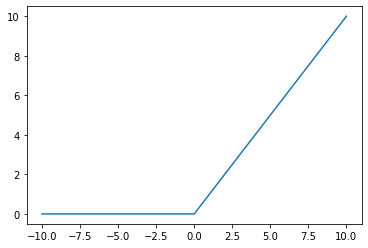

In [32]:
# plot inputs and outputs
from matplotlib import pyplot

# rectified linear function
def rectified(x):
    return max(0.0, x)

# define a series of inputs
series_in = [x for x in range(-10, 11)]

# calculate outputs for our inputs
series_out = [rectified(x) for x in series_in]

# line plot of raw inputs to rectified outputs
pyplot.plot(series_in, series_out)
pyplot.show()

Running the example creates a line plot showing that all negative values and zero inputs are snapped to 0.0, whereas the positive outputs are returned as-is, resulting in a linearly increasing slope, given that we created a linearly increasing series of positive values (e.g., 1 to 10).

The derivative of the rectified linear function is also easy to calculate. Recall that the derivative of the activation function is required when updating a node's weights as part of the backpropagation of error. The derivative of the function is the slope. The slope for negative values is 0.0, and the slope for positive values is 1.0. Traditionally, the field of neural networks has avoided any activation function that was not completely differentiable, perhaps delaying the adoption of the rectified linear function and other piecewise-linear functions. Technically, we cannot calculate the derivative when the input is 0.0, therefore, we can assume zero. This is not a problem in practice.

Using the rectified linear activation function offers many advantages; let's look at a few in the next section.

### Advantages of the Rectified Linear Activation Function

The rectified linear activation function has rapidly become the default activation function when developing most types of neural networks. As such, it is important to take a moment to review some of the benefits of the approach, first highlighted by Xavier Glorot et al. in their milestone 2012 paper on using ReLU titled Deep Sparse Rectifier Neural Networks.

**Computational Simplicity**
The rectifier function is trivial to implement, requiring a max() function. This is unlike the tanh and sigmoid activation functions that require the use of an exponential calculation.

**Representational Sparsity**
An important benefit of the rectifier function is that it is capable of outputting a true zero value. This is unlike the tanh and sigmoid activation functions that learn to approximate a zero output, e.g., a value very close to zero but not a true zero value. This means that negative inputs can output true zero values allowing the activation of hidden layers in neural networks to contain one or more true zero values. This is called a sparse representation and is a desirable property in representational learning as it can accelerate learning and simplify the model. An area where efficient representations such as sparsity are studied and sought is in autoencoders, where a network learns a compact representation of an input (called the code layer), such as an image or series before it is reconstructed from the compact representation.

**Linear Behavior**
The rectifier function mostly looks and acts like a linear activation function. In general, a neural network is easier to optimize when its behavior is linear or close to linear.

The key to this property is that networks trained with this activation function almost completely avoid the problem of vanishing gradients, as the gradients remain proportional to the node activations.

**Train Deep Networks**
Importantly, the (re-)discovery and adoption of the rectified linear activation function meant that it became possible to exploit improvements in hardware and successfully train deep, multilayered networks with a nonlinear activation function using backpropagation. In turn, cumbersome networks such as Boltzmann machines could be left behind, as well as cumbersome training schemes such as layer-wise training and unlabeled pre-training.

### Tips for Using the Rectified Linear Activation

In this section, we'll take a look at some tips when using the rectified linear activation function in your own deep learning neural networks.

**Use ReLU as the Default Activation Function**
For a long time, the default activation to use was the sigmoid activation function. Later, it was the tanh activation function. For modern deep learning neural networks, the default activation function is the rectified linear activation function.

Most papers that achieve state-of-the-art results will describe a network using ReLU. For example, in the milestone 2012 paper by Alex Krizhevsky et al., ImageNet Classification with Deep Convolutional Neural Networks, the authors developed a deep convolutional neural network with ReLU activations results on the ImageNet photo classification dataset.

If in doubt, start with ReLU in your neural network, then perhaps try other piecewise linear activation functions to see how their performance compares.

**Use ReLU with MLPs, CNNs, but Probably Not RNNs**
The ReLU can be used with most types of neural networks. It is recommended as the default for both Multilayer Perceptron (MLP) and Convolutional Neural Networks (CNNs). The use of ReLU with CNNs has been investigated thoroughly and almost universally results in an
improvement in results, initially, surprisingly so.

Work investigating ReLU with CNNs is what provoked their use with other network types.

When using ReLU with CNNs, they can be used as the activation function on the filter maps themselves, followed by a pooling layer.

Traditionally, LSTMs use the tanh activation function to activate the cell state and the sigmoid activation function for the node output. Given their careful design, ReLU was thought inappropriate for Recurrent Neural Networks (RNNs) such as the Long Short-Term Memory Network (LSTM) by default.

Nevertheless, there has been some work on investigating the use of ReLU as the output activation in LSTMs, the result of which is a careful initialization of network weights to ensure that the network is stable before training. This is outlined in the 2015 paper titled A Simple Way to Initialize Recurrent Networks of Rectified Linear Units.

**Try a Smaller Bias Input Value**
The bias is the input on the node that has a fixed value. The bias has the effect of shifting the activation function, and it is traditional to set the bias input value to 1.0. When using ReLU in your network, consider setting the bias to a small value, such as 0.1.

There are conflicting reports on whether this is required, so compare performance to a model with a 1.0 bias input.

**Use He Weight Initialization**
Before training a neural network, the weights of the network must be initialized to small random values. When using ReLU in your network and initializing weights to small random values centered on zero, then by default, half of the units in the network will output a zero value.

There are many heuristic methods to initialize the weights for a neural network, yet there is no best weight initialization scheme and little relationship beyond general guidelines for mapping weight initialization schemes to the choice of the activation function. Before the wide adoption of ReLU, Xavier Glorot and Yoshua Bengio proposed an initialization scheme in their 2010 paper titled Understanding the difficulty of training deep feedforward neural networks that quickly became the default when using sigmoid and tanh activation functions, generally referred to as Xavier initialization. Weights are set at random values sampled uniformly from a range proportional to the size of the number of nodes in the previous layer (specifically +/- 1/sqrt(n) where n is the number of nodes in the prior layer). Kaiming He et al., in their 2015 paper titled Delving Deep into Rectifier: Surpassing Human-Level Performance on ImageNet Classification, suggested that Xavier initialization and other schemes were not appropriate for ReLU and extensions.

They proposed a small modification of Xavier initialization to make it suitable for use with ReLU, now commonly referred to as He initialization (specifically +/- 2/sqrt(n) where n is the number of nodes in the prior layer). In practice, both Gaussian and uniform versions of the scheme can be used.

**Scale Input Data**
It is good practice to scale input data before using a neural network. This may involve standardizing variables to have a zero mean and unit variance or normalizing each value to the scale of 0-to-1. Without data scaling on many problems, the neural network's weights can grow large, making the network unstable and increasing the generalization error. This good
practice of scaling inputs applies whether using ReLU for your network or not.

**Use Weight Penalty**
By design, the output from ReLU is unbounded in the positive domain. This means that in some cases, the output can continue to grow in size. As such, it may be a good idea to use a form of weight regularization, such as an L1 or L2 vector norm.

This can be a good practice to promote sparse representations (e.g., with L1 regularization) and reduce the model's generalization error.

**Extensions and Alternatives to ReLU**
The ReLU does have some limitations. Key among the limitations of ReLU is the case where large weight updates can mean that the summed input to the activation function is always negative, regardless of the input to the network. This means that a node with this problem will forever output an activation value of 0.0. This is referred to as a dying ReLU.

Some popular extensions to the ReLU relax the nonlinear output of the function to allow small negative values in some way. The Leaky ReLU (LReLU or LReL) modifies the function to allow small negative values when the input is less than zero.

The Exponential Linear Unit, or ELU, is a generalization of the ReLU that uses a parameterized exponential function to transition from the positive to small negative values.

The Parametric ReLU, or PReLU, learns parameters that control the shape and leaky-ness of the function.

Maxout is an alternative piecewise linear function that returns the maximum of the inputs, designed to be used in conjunction with the dropout regularization technique.

## ReLU Case Study

This section will demonstrate using ReLU to counter the vanishing gradient problem with an MLP on a simple classification problem. This example provides a template for exploring ReLU with your own neural network for classification and regression problems.

### Binary Classification Problem

As the basis for our exploration, we will use a very simple two-class or binary classification problem. The scikit-learn class provides the make circles() function that can be used to create a binary classification problem with the prescribed number of samples and statistical noise. Each example has two input variables that define the x and y coordinates of the point on a two-dimensional plane. The points are arranged in two concentric circles (they have the same center) for the two classes. The number of points in the dataset is specified by a parameter, half of which will be drawn from each circle. Gaussian noise can be added when sampling the points via the noise argument that defines the standard deviation of the noise, where 0.0 indicates no noise or points drawn exactly from the circles. The seed for the pseudorandom number generator can be specified via the random state argument that allows the exact same points to be sampled each time the function is called. The example below generates 1,000 examples from the two circles with noise and a value of 1 to seed the pseudorandom number generator.

In [33]:
from sklearn.datasets import make_circles

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

We can create a graph of the dataset, plotting the x and y coordinates of the input variables (X) and coloring each point by the class value (0 or 1). The complete example is listed below.

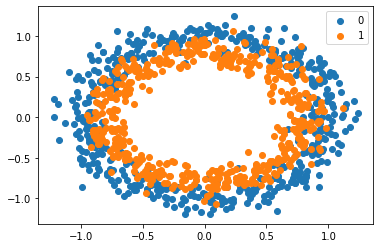

In [35]:
# scatter plot of the circles dataset with points colored by class
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot

# generate circles
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# select indices of points with each class label
for i in range(2):
    samples_ix = where(y == i)
    pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))

pyplot.legend()
pyplot.show()

Running the example creates a plot showing the 1,000 generated data points with the class value of each point used to color each point. We can see points for class 0 are blue and represent the outer circle, and points for class 1 are orange and represent the inner circle. The statistical noise of the generated samples means that there is some overlap of points between the two circles, adding some ambiguity to the problem, making it non-trivial. This is desirable as a neural network may choose one of many possible solutions to classify the points between the two circles and always make some errors.

Now that we have defined a problem as the basis for our exploration, we can look at developing a model to address it.

### Multilayer Perceptron Model

We can develop a Multilayer Perceptron model to address the two circles problem. This will be a simple feedforward neural network model designed as we were taught in the late 1990s and early 2000s. First, we will generate 1,000 data points from the two circles problem and rescale the inputs to the range [-1, 1]. The data is almost already in this range, but we will make sure. Normally, we would prepare the data scaling using a training dataset and apply it to a test dataset. To keep things simple in this tutorial, we will scale all of the data together before splitting it into train and test sets.

In [37]:
from sklearn.preprocessing import MinMaxScaler

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

# scale input data to [-1,1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

Next, we will split the data into train and test sets. Half of the data will be used for training, and the remaining 500 examples will be used as the test set. In this tutorial, the test set will also serve as the validation dataset to understand how the model performs on the holdout set during training.

In [38]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we will define the model. The model will have an input layer with two inputs for the two variables in the dataset, one hidden layer with five nodes, and an output layer with one node used to predict the class probability. The hidden layer will use the hyperbolic tangent activation function (tanh), and the output layer will use the logistic activation function (sigmoid) to predict class 0 or class 1 or something in between. Using the hyperbolic tangent activation function in hidden layers was the best practice in the 1990s and 2000s, performing generally better than the logistic function when used in the hidden layer. It was also good practice to initialize the network weights to small random values from a uniform distribution. Here, we will initialize weights randomly from the range [0.0, 1.0].

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import RandomUniform

# define model
model = Sequential()
init = RandomUniform(minval=0, maxval=1)
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

The model uses the binary cross-entropy loss function and is optimized using stochastic gradient descent with a learning rate of 0.01 and a large momentum of 0.9.

In [42]:
from tensorflow.keras.optimizers import SGD

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

The model is trained for 500 training epochs, and the test dataset is evaluated at the end of each epoch along with the training dataset.

In [43]:
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

After the model is fit, it is evaluated on both the train and test datasets, and the accuracy scores are displayed.

In [44]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.818, Test: 0.832


Finally, the model's accuracy during each training step is graphed as a line plot, showing the dynamics of the model as it learned the problem.

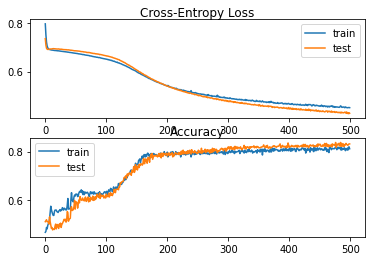

In [46]:
from matplotlib import pyplot

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

Running the example fits the model in just a few seconds. The model performance on the train and test sets is calculated and displayed.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that the model learned the problem well, achieving an accuracy of about 81.6% on both the train and test datasets.

A line plot of model loss and accuracy on the train and test sets are created, showing the change in overall performance in 500 training epochs. The plots suggest, for this run, that the performance begins to slow around epoch 200 at about 80% accuracy for both the train and test sets.

Now that we have seen how to develop a classical MLP using the tanh activation function for the two circles problem, we can modify the model to have many more hidden layers.

### Deeper MLP Model

Traditionally, developing deep Multilayer Perceptron models was challenging. Deep models using the hyperbolic tangent activation function do not train easily, and much of this poor performance is blamed on the vanishing gradient problem. The number of hidden layers can be increased from 1 to 5; for example, we can investigate this using the MLP model developed in the previous section.

In [47]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

We can then re-run the example and review the results. The complete example of the deeper MLP is listed below.

Train: 0.564, Test: 0.582


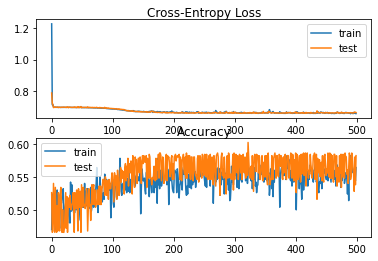

In [49]:
# deeper mlp with tanh for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import RandomUniform
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Running the example first prints the performance of the fit model on the train and test datasets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that performance is quite poor on both the train and test sets achieving around 50% accuracy. This suggests that the model as configured could not learn the problem nor generalize a solution.


The line plots of model accuracy on the train and test sets during training tell a similar story. We can see that performance is bad and actually gets worse as training progresses.

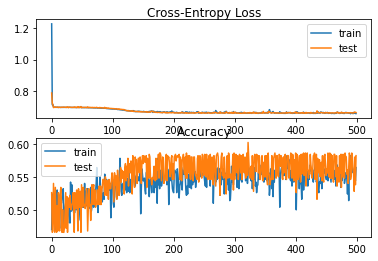

In [50]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### Deeper MLP Model with ReLU

The rectified linear activation function has supplanted the hyperbolic tangent activation function as the preferred default when developing Multilayer Perceptron networks and other network types like CNNs. The activation function looks and acts like a linear function, making it easier to train and less likely to saturate. It is, in fact, a nonlinear function, forcing negative inputs to the value 0. It is claimed as one possible approach to addressing the vanishing gradients problem when training deeper models. Using the rectified linear activation function (or ReLU for short), using the He weight initialization scheme is good practice. We can define the MLP with five hidden layers using ReLU and He initialization, listed below.

In [51]:
# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

Tying this together, the complete code example is listed below.

In [52]:
# deeper mlp with relu for the two circles classification problem (5 hidden layers)
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.818, Test: 0.818


Running the example prints the performance of the model on the train and test datasets.

**Note**: Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

In this case, we can see that this small change has allowed the model to learn the problem, achieving about 84% accuracy on both datasets, outperforming the single-layer model using the tanh activation function.

A line plot of model accuracy on the train and test sets over training epochs is also created. The plot shows quite different dynamics from what we have seen so far. The model appears to rapidly learn the problem, converging on a solution in about 100 epochs.

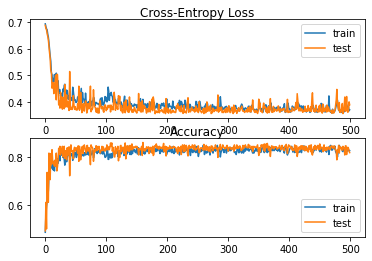

In [53]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

The use of the ReLU activation function has allowed us to fit a much deeper model for this simple problem, but this capability does not extend infinitely. For example, increasing the number of layers results in slower learning to a point at about 20 layers where the model is no longer capable of learning the problem, at least with the chosen configuration. For example, below is a line plot of train and test accuracy of the same model with 15 hidden layers that shows that it can still learn the problem (at least some of the time).

Train: 0.504, Test: 0.496


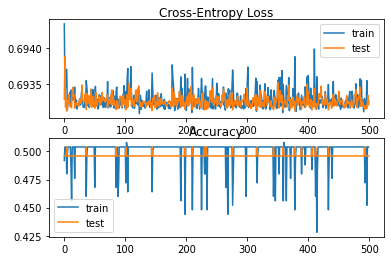

In [58]:
# deeper mlp with relu for the two circles classification problem (5 hidden layers)
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
for i in range(15):
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

Below is a line plot of train and test accuracy over epochs with the same model with 20 layers, showing that the configuration is no longer capable of learning the problem (at least some of the time).

Train: 0.504, Test: 0.496


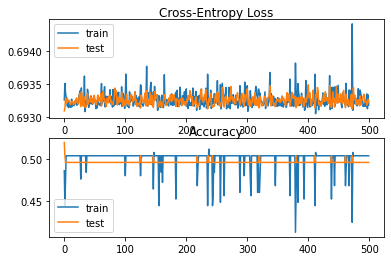

In [59]:
# deeper mlp with relu for the two circles classification problem (5 hidden layers)
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(5, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
for i in range(20):
    model.add(Dense(5, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=500, verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

Although the use of the ReLU worked, we cannot be confident that the tanh function failed because of vanishing gradients, and ReLU succeeds because it overcame this problem.

**Extensions**

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Weight Initialization**. Update the deep MLP with tanh activation to use Xavier uniform weight initialization and report the results.
* **Learning Algorithm**. Update the deep MLP with tanh activation to use an adaptive learning algorithm such as Adam and report the results.
* **Weight Changes**. Update the tanh and ReLU examples to record and plot the L1 vector norm of model weights each epoch as a proxy for how much each layer is changed during training and compare results.
* **Study Model Depth**. Create an experiment using the MLP with tanh activation and report the performance of models as the number of hidden layers is increased from 1 to 10.
* **Increase Breadth**. Increase the number of nodes in the hidden layers of the MLP with tanh activation from 5 to 25 and report performance as the number of layers is increased from 1 to 10.

**Summary**

In this tutorial, you discovered the rectified linear activation function for deep learning neural networks. Specifically, you learned:
* Due to the vanishing gradient problem, the sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers.
* The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
* The rectified linear activation is the default activation when developing Multilayer Perceptron and convolutional neural networks.